In [1]:
!pip install kaggle

#### Importing Face Mask Dataset

In [2]:
#API to fetch the dataset from kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

data  face-mask-dataset.zip  Mask.jpg  Person.png  sample_data


#### Import the Dependencies

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3274.jpg', 'with_mask_2139.jpg', 'with_mask_330.jpg', 'with_mask_2056.jpg', 'with_mask_1326.jpg']
['with_mask_845.jpg', 'with_mask_2367.jpg', 'with_mask_240.jpg', 'with_mask_1028.jpg', 'with_mask_3330.jpg']


In [7]:
without_mask_files = os.listdir('/content/data/without_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3274.jpg', 'with_mask_2139.jpg', 'with_mask_330.jpg', 'with_mask_2056.jpg', 'with_mask_1326.jpg']
['with_mask_845.jpg', 'with_mask_2367.jpg', 'with_mask_240.jpg', 'with_mask_1028.jpg', 'with_mask_3330.jpg']


In [8]:
print('Number of mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of mask images: 3725
Number of without mask images: 3828


#### Creating Lables for the two class of Images

with mask --> 1

without mask --> 0

In [9]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [12]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


#### Displaying the Images

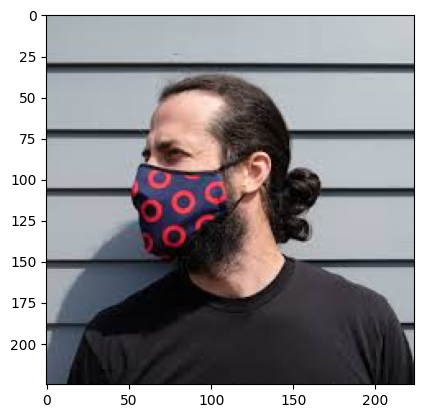

In [13]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1028.jpg')
imgplot = plt.imshow(img)
plt.show()

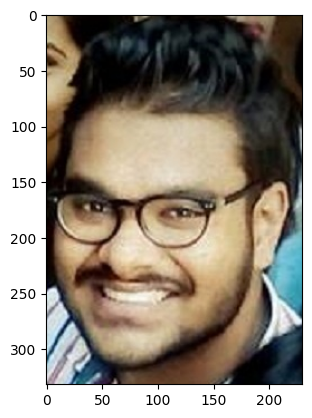

In [14]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_1111.jpg')
imgplot = plt.imshow(img)
plt.show()

#### Image Processing

1. Resize the Images

2. Convert the images to numpy arrays

In [15]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
type(data)

list

In [17]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [240, 239, 235],
        [240, 239, 235],
        [240, 239, 235]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [238, 237, 233],
        [239, 238, 234],
        [239, 238, 234]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [240, 239, 235],
        [241, 241, 237],
        [241, 240, 236]]], dtype=uint8)
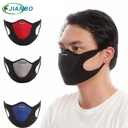

In [18]:
data[0]

In [19]:
type(data[0])

numpy.ndarray

In [20]:
data[0].shape

(128, 128, 3)

In [21]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [22]:
type(X)

numpy.ndarray

In [23]:
type(Y)

numpy.ndarray

In [24]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


#### Train Test Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [28]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[113, 150, 194],
        [116, 152, 197],
        [121, 157, 201],
        ...,
        [146, 183, 228],
        [146, 183, 228],
        [145, 182, 227]],

       [[109, 148, 187],
        [113, 151, 191],
        [120, 158, 198],
        ...,
        [146, 183, 228],
        [146, 183, 228],
        [145, 182, 227]],

       [[111, 149, 190],
        [115, 153, 193],
        [114, 149, 190],
        ...,
        [145, 182, 227],
        [145, 182, 227],
        [145, 182, 227]]], dtype=uint8)
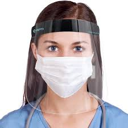

In [29]:
X_train[0]

In [30]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.44313725, 0.58823529, 0.76078431],
        [0.45490196, 0.59607843, 0.77254902],
        [0.4745098 , 0

### Building a Convolutional Neural Networks (CNN)

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [33]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [34]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=5)

Epoch 1/5
152/152 [==============================] - 10s 28ms/step - loss: 0.4840 - acc: 0.7890 - val_loss: 0.2867 - val_acc: 0.8850
Epoch 2/5
152/152 [==============================] - 4s 26ms/step - loss: 0.2984 - acc: 0.8773 - val_loss: 0.2654 - val_acc: 0.8842
Epoch 3/5
152/152 [==============================] - 4s 25ms/step - loss: 0.2559 - acc: 0.8972 - val_loss: 0.2315 - val_acc: 0.8974
Epoch 4/5
152/152 [==============================] - 4s 28ms/step - loss: 0.2222 - acc: 0.9108 - val_loss: 0.2857 - val_acc: 0.8974
Epoch 5/5
152/152 [==============================] - 4s 27ms/step - loss: 0.1837 - acc: 0.9239 - val_loss: 0.3038 - val_acc: 0.8974


#### Model Evaluation

In [35]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2754 - acc: 0.9120
Test Accuracy = 0.9119788408279419


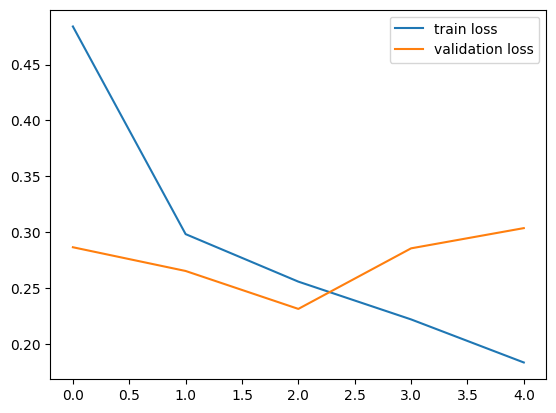

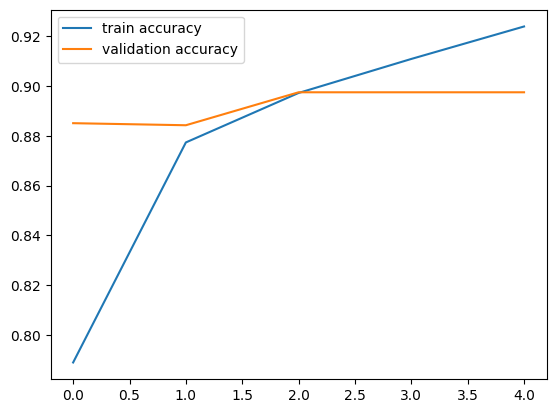

In [36]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

#### Predictive System

Path of the image to be predicted: /content/Mask.jpg


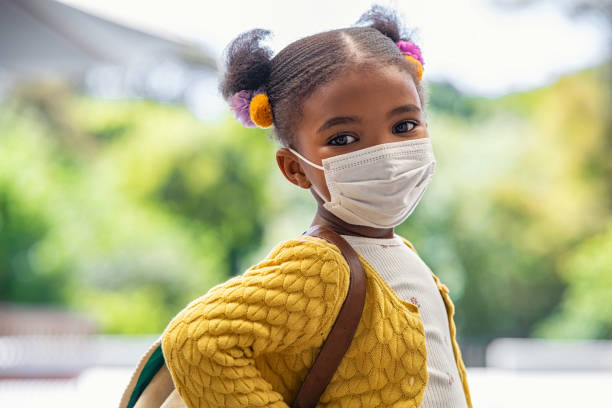

1/1 [==============================] - 0s 185ms/step
[[0.45591798 0.63075113]]
1
The person in the image is wearing a mask


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/Person.png


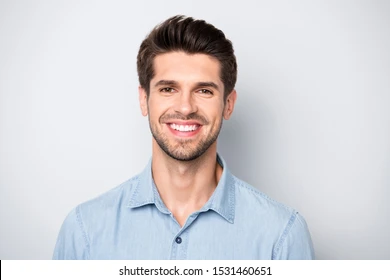

1/1 [==============================] - 0s 17ms/step
[[0.51786274 0.48152435]]
0
The person in the image is not wearing a mask


In [38]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')